# M. Sc. Project 
- #### Name: Vishal Rathour
- #### Roll No.: M22PH016
- #### Title : Investigation of micron sized particle via light scattering method using Machine Learning
- #### Supervisor : Dr. V. Narayanan


# **Investigation of micron sized particle via light scattering method using Machine Learning**

---

## Experimental setup for Mie Scattering of light from micron sized particles
---


In [1]:
from IPython.display import display, Image
image_url = 'https://europepmc.org/articles/PMC5804501/bin/nihms-761416-f0001.jpg'

# Display the image
display(Image(url=image_url))

In [2]:
# Install the library of calculating Mie Scattering Intensity
!pip install PyMieScatt


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\Asus\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [3]:
# Import the libraries
import PyMieScatt as ps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Given parameters
m = 1.33257 + 1.67e-8j  # refractive index
# r_values = [5, 10, 20]  # microns
# wavelength = 632  # nm



---
# **ML Implementation**


---




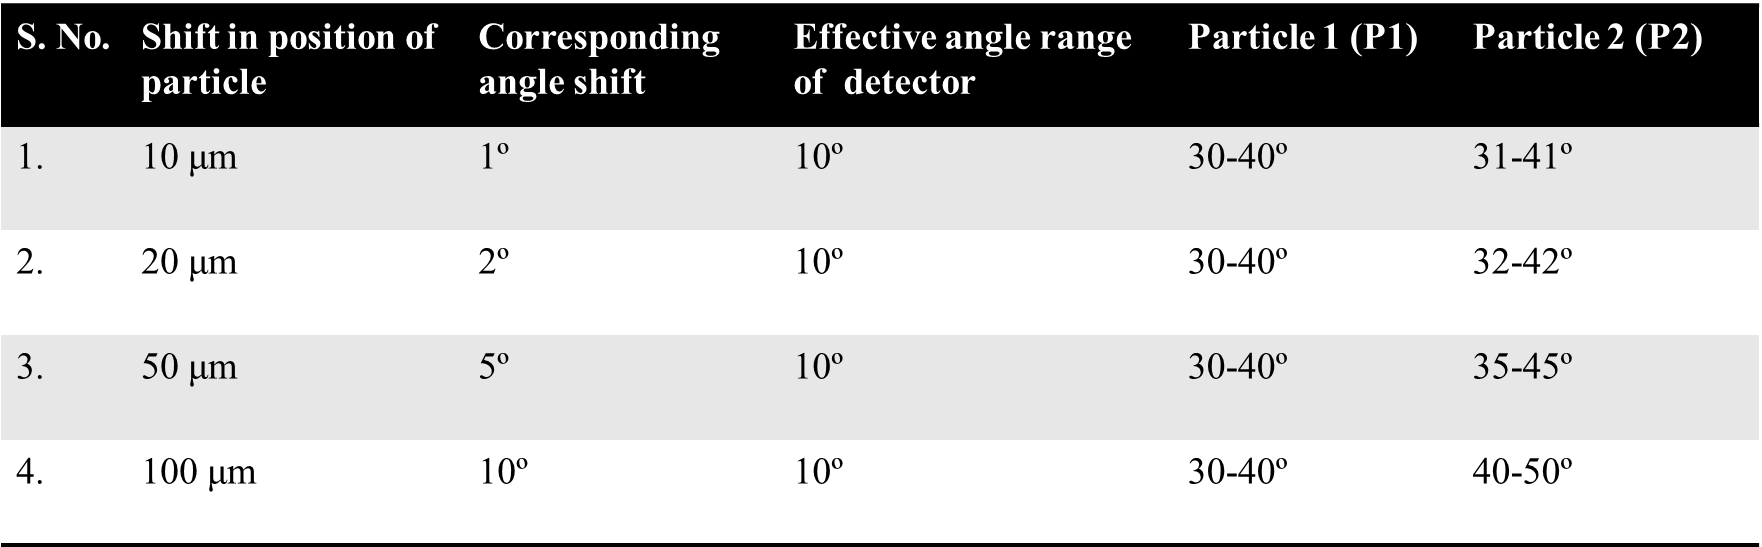

## Case 1

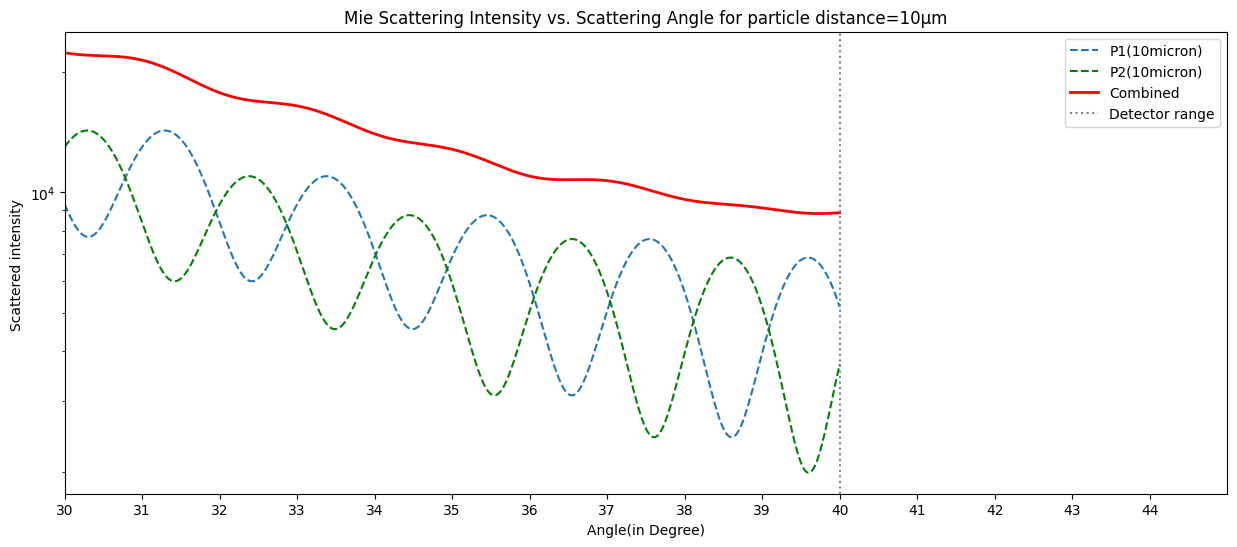

In [5]:
# Import the libraries
import PyMieScatt as ps
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
m = 1.33257 + 1.67e-8j  # refractive index
wavelength = 632  # nm

r1 = 10  # microns
r2 = 10  # microns

diameter1 = 2 * r1 * 1000  # nm
diameter2 = 2 * r2 * 1000  # nm

distance = 10 #micron


'''
The distance b/w the particle p1 & p2 is 10microns and the corresponding shift in the angle for detector is 1 deg 
Detector range is 10 deg
For p1 angle range 30-40
For p2 angle range 31-41
'''


theta1, SL1, SR1, SU1 = ps.ScatteringFunction(m, wavelength, diameter1,
                    nMedium=1.0, minAngle=30, maxAngle=40, angularResolution=0.01,
                    space='theta', angleMeasure='radians', normalization=None)

theta2, SL2, SR2, SU2 = ps.ScatteringFunction(m, wavelength, diameter2,
                    nMedium=1.0, minAngle=31, maxAngle=41, angularResolution=0.01,
                    space='theta', angleMeasure='radians', normalization=None)

theta_deg1 = theta1*(180/np.pi)
theta_deg2 = theta2*(180/np.pi)

plt.figure(figsize=(15,6))
plt.semilogy(theta_deg1, SL1, label=f'P1({r1}micron)',ls='--' )
plt.semilogy(theta_deg1, SL2, label=f'P2({r2}micron)',c='g',ls='--')
plt.semilogy(theta_deg1, SL1+SL2, label='Combined',c='red',lw=2)
plt.axvline(x=40, label='Detector range', ls='dotted', c='gray')
plt.xticks(np.arange(30, 45, 1))
plt.xlim(30, 45)
plt.xlabel('Angle(in Degree)')
plt.ylabel('Scattered intensity ')
plt.title(f'Mie Scattering Intensity vs. Scattering Angle for particle distance={distance}μm')
plt.legend()
plt.show()

## **Creating the dataframe to apply Machine Learning models**

In [6]:
import pandas as pd

# here r1 = radius of first particle = 10 micron
# here r2 = radius of first particle = 10 micron
# here res = resultant of all two particle intensities

df1 = pd.DataFrame({
    'theta_deg': theta_deg1,
    'I': SL1,
    'r': 'p1',})

df2 = pd.DataFrame({
    'theta_deg': theta_deg1,
    'I': SL2,
    'r': 'p2',})

df3 = pd.DataFrame({
    'theta_deg': theta_deg1,
    'I': SL1+SL2,
    'r': 'res',})

df_1deg_shift = pd.concat([df1, df2, df3], axis=0, ignore_index=True)
df_1deg_shift

,theta_deg,I,r
0,30.00,9327.276561,p1
1,30.01,9229.598561,p1
2,30.02,9134.466893,p1
3,30.03,9041.956589,p1
4,30.04,8952.140147,p1
...,...,...,...
2998,39.96,8876.068132,res
2999,39.97,8878.837805,res
3000,39.98,8881.681268,res
3001,39.99,8884.593961,res


In [7]:
# df.to_csv('Dataframe used for ML')

#### Try using several models to check which one is giving best accuracy on classification prediction

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Split the dataset into features (X) and labels (y)
X = df_1deg_shift.iloc[:, :-1]  # Features: theta_deg and I
y = df_1deg_shift.iloc[:, -1]   # Labels: r

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Print accuracy results
for name, accuracy in results.items():
    print(f"{name}: {accuracy}")

Logistic Regression: 0.49584026622296173
Decision Tree: 0.9450915141430949
Random Forest: 0.9833610648918469
AdaBoost: 0.670549084858569
Gradient Boosting: 0.9667221297836939
K-Nearest Neighbors: 0.46422628951747086
Naive Bayes: 0.5540765391014975
Support Vector Machine: 0.6256239600665557


Now as we see that Random forest is giving best accuracy so we will use this model for our further uses

## **Random Forest Implementation**

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the dataset into features (X) and labels (y)
X = df_1deg_shift.iloc[:, :-1]  # Features: theta_deg and I
y = df_1deg_shift.iloc[:, -1]   # Labels: r

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest model
random_forest = RandomForestClassifier()

# Train the Random Forest model
random_forest.fit(X_train, y_train)

# Predict using the Random Forest model
y_pred = random_forest.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy result
print("Random Forest Accuracy: {:.2f}%".format(accuracy * 100))

Random Forest Accuracy: 98.00%


## Case 2

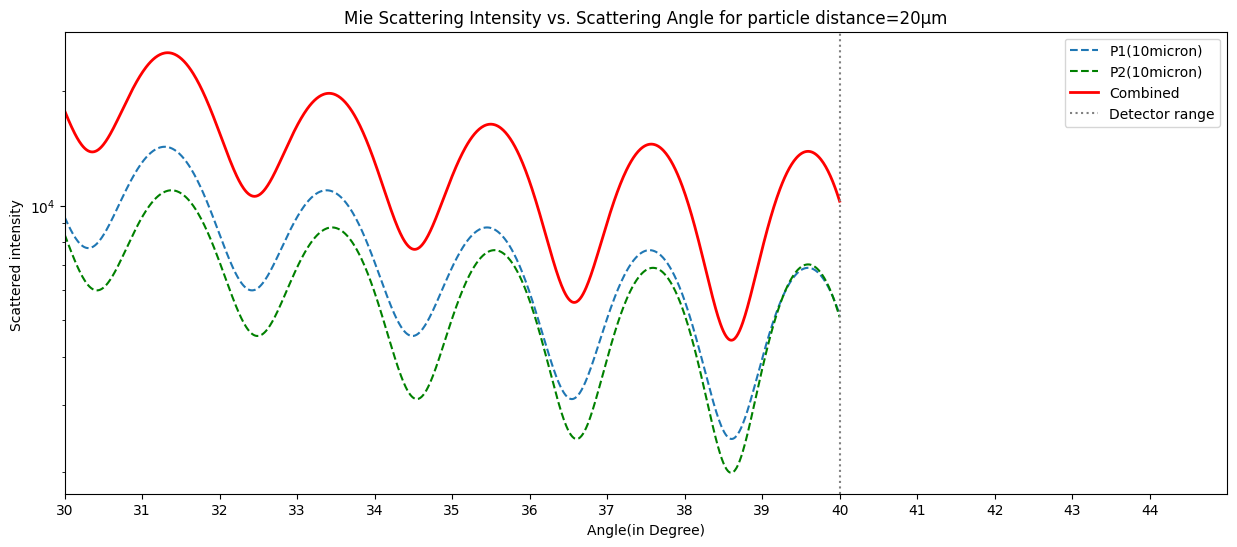

In [11]:
# Import the libraries
import PyMieScatt as ps
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
m = 1.33257 + 1.67e-8j  # refractive index
wavelength = 632  # nm

r1 = 10  # microns
r2 = 10  # microns

diameter1 = 2 * r1 * 1000  # nm
diameter2 = 2 * r2 * 1000  # nm

distance = 20 #micron


'''
The distance b/w the particle p1 & p2 is 20microns and the corresponding shift in the angle for detector is 2 deg 
Detector range is 10 deg
For p1 angle range 30-40
For p2 angle range 32-42
'''


theta1, SL1, SR1, SU1 = ps.ScatteringFunction(m, wavelength, diameter1,
                    nMedium=1.0, minAngle=30, maxAngle=40, angularResolution=0.01,
                    space='theta', angleMeasure='radians', normalization=None)

theta2, SL2, SR2, SU2 = ps.ScatteringFunction(m, wavelength, diameter2,
                    nMedium=1.0, minAngle=32, maxAngle=42, angularResolution=0.01,
                    space='theta', angleMeasure='radians', normalization=None)

theta_deg1 = theta1*(180/np.pi)
theta_deg2 = theta2*(180/np.pi)

plt.figure(figsize=(15,6))
plt.semilogy(theta_deg1, SL1, label=f'P1({r1}micron)',ls='--' )
plt.semilogy(theta_deg1, SL2, label=f'P2({r2}micron)',c='g',ls='--')
plt.semilogy(theta_deg1, SL1+SL2, label='Combined',c='red',lw=2)
plt.axvline(x=40, label='Detector range', ls='dotted', c='gray')
plt.xticks(np.arange(30, 45, 1))
plt.xlim(30, 45)
plt.xlabel('Angle(in Degree)')
plt.ylabel('Scattered intensity ')
plt.title(f'Mie Scattering Intensity vs. Scattering Angle for particle distance={distance}μm')
plt.legend()
plt.show()

In [12]:
df1 = pd.DataFrame({
    'theta_deg': theta_deg1,
    'I': SL1,
    'r': 'p1',})

df2 = pd.DataFrame({
    'theta_deg': theta_deg1,
    'I': SL2,
    'r': 'p2',})

df3 = pd.DataFrame({
    'theta_deg': theta_deg1,
    'I': SL1+SL2,
    'r': 'res',})

df_2deg_shift = pd.concat([df1, df2, df3], axis=0, ignore_index=True)
df_2deg_shift

,theta_deg,I,r
0,30.00,9327.276561,p1
1,30.01,9229.598561,p1
2,30.02,9134.466893,p1
3,30.03,9041.956589,p1
4,30.04,8952.140147,p1
...,...,...,...
2998,39.96,10865.481352,res
2999,39.97,10718.069569,res
3000,39.98,10568.651209,res
3001,39.99,10417.370175,res


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Split the dataset into features (X) and labels (y)
X = df_2deg_shift.iloc[:, :-1]  # Features: theta_deg and I
y = df_2deg_shift.iloc[:, -1]   # Labels: r

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Print accuracy results
for name, accuracy in results.items():
    print(f"{name}: {accuracy}")

Logistic Regression: 0.5207986688851913
Decision Tree: 0.9151414309484193
Random Forest: 0.9234608985024958
AdaBoost: 0.6589018302828619
Gradient Boosting: 0.9051580698835274
K-Nearest Neighbors: 0.4176372712146423
Naive Bayes: 0.5607321131447587
Support Vector Machine: 0.5590682196339434


## **Random Forest Implementation**

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the dataset into features (X) and labels (y)
X = df_2deg_shift.iloc[:, :-1]  # Features: theta_deg and I
y = df_2deg_shift.iloc[:, -1]   # Labels: r

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest model
random_forest = RandomForestClassifier()

# Train the Random Forest model
random_forest.fit(X_train, y_train)

# Predict using the Random Forest model
y_pred = random_forest.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy result
print("Random Forest Accuracy: {:.2f}%".format(accuracy * 100))

Random Forest Accuracy: 93.68%


## Case 3

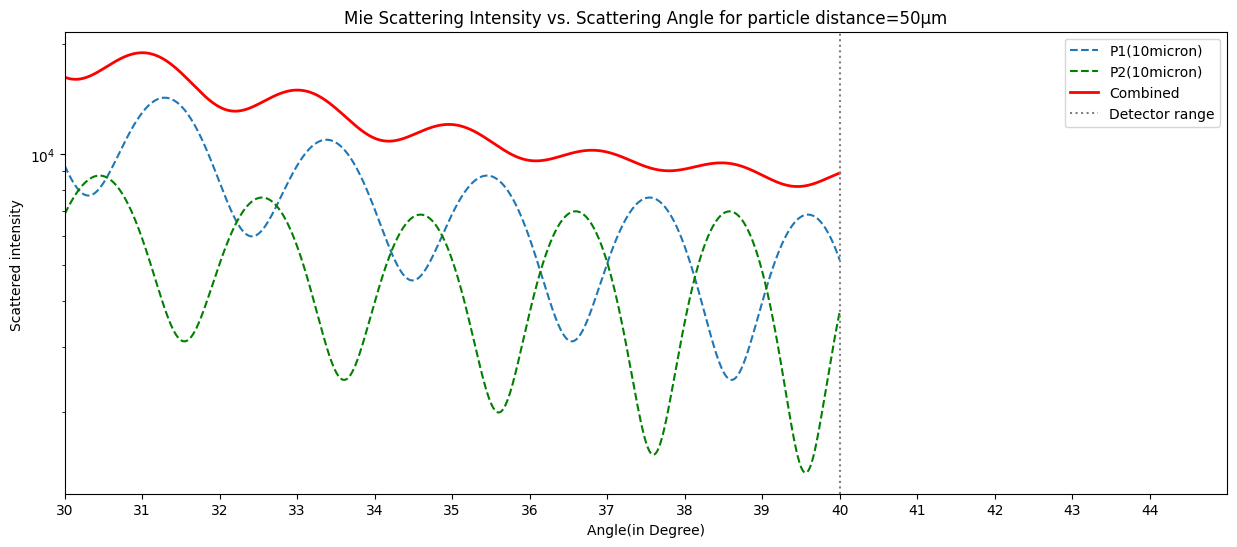

In [15]:
# Import the libraries
import PyMieScatt as ps
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
m = 1.33257 + 1.67e-8j  # refractive index
wavelength = 632  # nm

r1 = 10  # microns
r2 = 10  # microns

diameter1 = 2 * r1 * 1000  # nm
diameter2 = 2 * r2 * 1000  # nm

distance = 50 #micron


'''
The distance b/w the particle p1 & p2 is 50microns and the corresponding shift in the angle for detector is 5 deg 
Detector range is 10 deg
For p1 angle range 30-40
For p2 angle range 35-45
'''


theta1, SL1, SR1, SU1 = ps.ScatteringFunction(m, wavelength, diameter1,
                    nMedium=1.0, minAngle=30, maxAngle=40, angularResolution=0.01,
                    space='theta', angleMeasure='radians', normalization=None)

theta2, SL2, SR2, SU2 = ps.ScatteringFunction(m, wavelength, diameter2,
                    nMedium=1.0, minAngle=35, maxAngle=45, angularResolution=0.01,
                    space='theta', angleMeasure='radians', normalization=None)

theta_deg1 = theta1*(180/np.pi)
theta_deg2 = theta2*(180/np.pi)

plt.figure(figsize=(15,6))
plt.semilogy(theta_deg1, SL1, label=f'P1({r1}micron)',ls='--' )
plt.semilogy(theta_deg1, SL2, label=f'P2({r2}micron)',c='g',ls='--')
plt.semilogy(theta_deg1, SL1+SL2, label='Combined',c='red',lw=2)
plt.axvline(x=40, label='Detector range', ls='dotted', c='gray')
plt.xticks(np.arange(30, 45, 1))
plt.xlim(30, 45)
plt.xlabel('Angle(in Degree)')
plt.ylabel('Scattered intensity ')
plt.title(f'Mie Scattering Intensity vs. Scattering Angle for particle distance={distance}μm')
plt.legend()
plt.show()

In [16]:
df1 = pd.DataFrame({
    'theta_deg': theta_deg1,
    'I': SL1,
    'r': 'p1',})

df2 = pd.DataFrame({
    'theta_deg': theta_deg1,
    'I': SL2,
    'r': 'p2',})

df3 = pd.DataFrame({
    'theta_deg': theta_deg1,
    'I': SL1+SL2,
    'r': 'res',})

df_5deg_shift = pd.concat([df1, df2, df3], axis=0, ignore_index=True)
df_5deg_shift

,theta_deg,I,r
0,30.00,9327.276561,p1
1,30.01,9229.598561,p1
2,30.02,9134.466893,p1
3,30.03,9041.956589,p1
4,30.04,8952.140147,p1
...,...,...,...
2998,39.96,8830.359928,res
2999,39.97,8847.708528,res
3000,39.98,8864.794438,res
3001,39.99,8881.591516,res


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Split the dataset into features (X) and labels (y)
X = df_5deg_shift.iloc[:, :-1]  # Features: theta_deg and I
y = df_5deg_shift.iloc[:, -1]   # Labels: r

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Print accuracy results
for name, accuracy in results.items():
    print(f"{name}: {accuracy}")

Logistic Regression: 0.5607321131447587
Decision Tree: 0.961730449251248
Random Forest: 0.9816971713810316
AdaBoost: 0.7021630615640599
Gradient Boosting: 0.9267886855241264
K-Nearest Neighbors: 0.632279534109817
Naive Bayes: 0.5940099833610649
Support Vector Machine: 0.6455906821963394


## **Random Forest Implementation**

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the dataset into features (X) and labels (y)
X = df_5deg_shift.iloc[:, :-1]  # Features: theta_deg and I
y = df_5deg_shift.iloc[:, -1]   # Labels: r

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest model
random_forest = RandomForestClassifier()

# Train the Random Forest model
random_forest.fit(X_train, y_train)

# Predict using the Random Forest model
y_pred = random_forest.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy result
print("Random Forest Accuracy: {:.2f}%".format(accuracy * 100))

Random Forest Accuracy: 98.50%


## Case 4

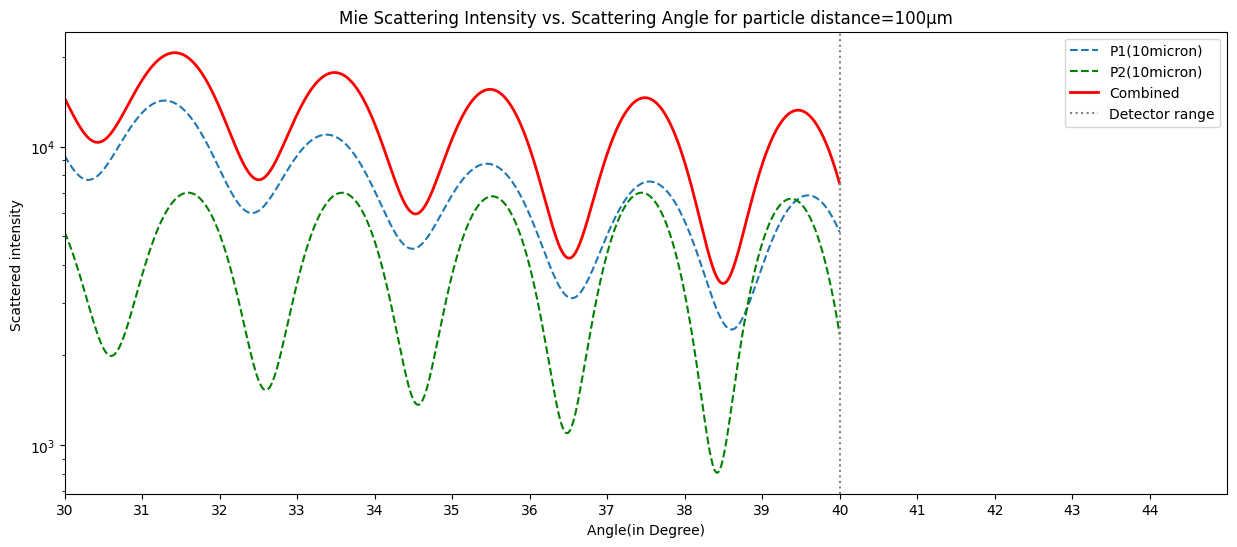

In [19]:
# Import the libraries
import PyMieScatt as ps
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
m = 1.33257 + 1.67e-8j  # refractive index
wavelength = 632  # nm

r1 = 10  # microns
r2 = 10  # microns

diameter1 = 2 * r1 * 1000  # nm
diameter2 = 2 * r2 * 1000  # nm

distance = 100 #micron


'''
The distance b/w the particle p1 & p2 is 20microns and the corresponding shift in the angle for detector is 2 deg 
Detector range is 10 deg
For p1 angle range 30-40
For p2 angle range 40-50
'''


theta1, SL1, SR1, SU1 = ps.ScatteringFunction(m, wavelength, diameter1,
                    nMedium=1.0, minAngle=30, maxAngle=40, angularResolution=0.01,
                    space='theta', angleMeasure='radians', normalization=None)

theta2, SL2, SR2, SU2 = ps.ScatteringFunction(m, wavelength, diameter2,
                    nMedium=1.0, minAngle=40, maxAngle=50, angularResolution=0.01,
                    space='theta', angleMeasure='radians', normalization=None)

theta_deg1 = theta1*(180/np.pi)
theta_deg2 = theta2*(180/np.pi)

plt.figure(figsize=(15,6))
plt.semilogy(theta_deg1, SL1, label=f'P1({r1}micron)',ls='--' )
plt.semilogy(theta_deg1, SL2, label=f'P2({r2}micron)',c='g',ls='--')
plt.semilogy(theta_deg1, SL1+SL2, label='Combined',c='red',lw=2)
plt.axvline(x=40, label='Detector range', ls='dotted', c='gray')
plt.xticks(np.arange(30, 45, 1))
plt.xlim(30, 45)
plt.xlabel('Angle(in Degree)')
plt.ylabel('Scattered intensity ')
plt.title(f'Mie Scattering Intensity vs. Scattering Angle for particle distance={distance}μm')
plt.legend()
plt.show()

In [20]:
df1 = pd.DataFrame({
    'theta_deg': theta_deg1,
    'I': SL1,
    'r': 'p1',})

df2 = pd.DataFrame({
    'theta_deg': theta_deg1,
    'I': SL2,
    'r': 'p2',})

df3 = pd.DataFrame({
    'theta_deg': theta_deg1,
    'I': SL1+SL2,
    'r': 'res',})

df_10deg_shift = pd.concat([df1, df2, df3], axis=0, ignore_index=True)
df_10deg_shift

,theta_deg,I,r
0,30.00,9327.276561,p1
1,30.01,9229.598561,p1
2,30.02,9134.466893,p1
3,30.03,9041.956589,p1
4,30.04,8952.140147,p1
...,...,...,...
2998,39.96,8158.595270,res
2999,39.97,7998.484093,res
3000,39.98,7838.577343,res
3001,39.99,7679.035820,res


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Split the dataset into features (X) and labels (y)
X = df_10deg_shift.iloc[:, :-1]  # Features: theta_deg and I
y = df_10deg_shift.iloc[:, -1]   # Labels: r

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Print accuracy results
for name, accuracy in results.items():
    print(f"{name}: {accuracy}")

Logistic Regression: 0.5790349417637272
Decision Tree: 0.9700499168053245
Random Forest: 0.9816971713810316
AdaBoost: 0.5241264559068219
Gradient Boosting: 0.9467554076539102
K-Nearest Neighbors: 0.5590682196339434
Naive Bayes: 0.5940099833610649
Support Vector Machine: 0.5873544093178037


## **Random Forest Implementation**

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the dataset into features (X) and labels (y)
X = df_10deg_shift.iloc[:, :-1]  # Features: theta_deg and I
y = df_10deg_shift.iloc[:, -1]   # Labels: r

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest model
random_forest = RandomForestClassifier()

# Train the Random Forest model
random_forest.fit(X_train, y_train)

# Predict using the Random Forest model
y_pred = random_forest.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy result
print("Random Forest Accuracy: {:.2f}%".format(accuracy * 100))

Random Forest Accuracy: 98.34%
